# Ví dụ đơn giản cho mô hình Linear Regression

Giả sử giá trị cân nặng và chiều cao của một người sẽ tỷ lệ với nhau. Khi một người càng cao thì sẽ càng nặng cân và ngược lại. Từ đó ta xây dựng một bộ dữ liệu giả định về chiều cao và cân nặng của N đối tượng và sử dụng mô hình LR để tìm ra mối quan hệ này.

### Khai báo thư viện numpy và matplotlib cho vẽ hình

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

### Tiếp theo, chúng ta khai báo và biểu diễn dữ liệu trên một đồ thị.

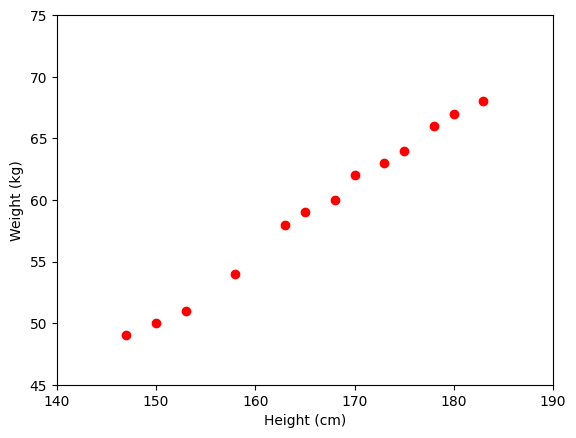

In [27]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### Tính toán nghiệm theo công thức

Nghiệm w: [[-33.73541021]
 [  0.55920496]]


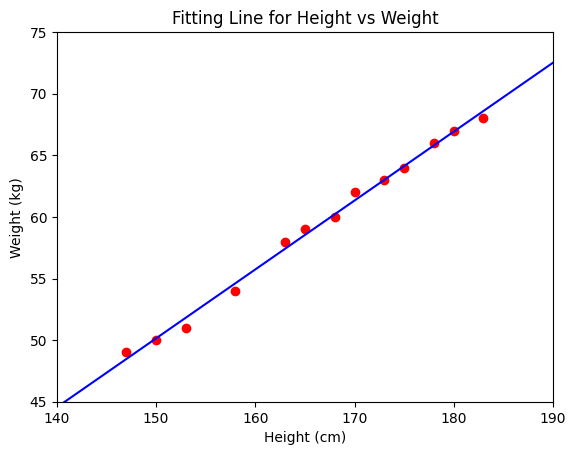

In [28]:
# Xây dựng Xbar (thêm cột 1 vào X)
one = np.ones((X.shape[0], 1)) # Xây dựng một ma trận với số hàng giống X và 1 cột, chứa toàn phần tử 1
Xbar = np.hstack((one, X))  # Nối cột 1 vào X

# Tính toán nghiệm theo công thức
A = np.dot(Xbar.T, Xbar)  # Tính A = Xbar^T * Xbar
b = np.dot(Xbar.T, y)      # Tính b = Xbar^T * y
w = np.dot(np.linalg.pinv(A), b) # Tính w = A^(-1) * b
print("Nghiệm w:", w)

# Tính toán fitting line
y_fit = np.dot(Xbar, w)  # Tính giá trị dự đoán y từ Xbar và w
# or
w_0 = w[0, 0]  # Hệ số góc
w_1 = w[1, 0]  # Hệ số góc
x0 = np.linspace(140, 190, 2)   # Tạo một mảng x từ 140 đến 190
y0 = w_0 + w_1 * x0  # Tính giá trị y tương ứng với x0

# Vẽ fitting line
plt.plot(X, y, 'ro')  # Vẽ dữ liệu gốc
# plt.plot(X, y_fit)  # Vẽ đường fitting line
plt.plot(x0, y0, 'b-')  # Vẽ đường fitting line từ x0 và y0
plt.axis([140, 190, 45, 75])   
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')   
plt.title('Fitting Line for Height vs Weight')
plt.show()

### Sử dụng mô hình để dự đoán

In [13]:
chieu_cao = int(input("Hãy nhập chiều cao của bạn:"))
can_nang = w_0 + w_1 * chieu_cao
print("Cân nặng của bạn là: ", round(can_nang, 2), "kg")


Cân nặng của bạn là:  57.97 kg


### Tính toán nghiệm bằng thư viện scikit-learn

In [29]:
from sklearn import linear_model

# Tính toán nghiệm bằng thư viện scikit-learn
model = linear_model.LinearRegression(fit_intercept=False)  # Khởi tạo mô hình với fit_intercept=False
model.fit(Xbar, y)  # Huấn luyện mô hình với dữ liệu X và y

# So sanh nghiệm từ scikit-learn với nghiệm tính toán
print("Nghiệm w từ scikit-learn:", model.coef_)
print("Nghiệm theo công thức:", w.T)


Nghiệm w từ scikit-learn: [[-33.73541021   0.55920496]]
Nghiệm theo công thức: [[-33.73541021   0.55920496]]


In [30]:
# In ra giá trị hàm loss
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, model.predict(Xbar))  # Tính toán MA
print("Mean Absolute Error (MAE):", mae)  # In ra giá trị MAE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, model.predict(Xbar))  # Tính toán MSE
print("Mean Squared Error (MSE):", mse)  # In ra giá trị MSE
rmse = np.sqrt(mse)  # Tính toán RMSE
print("Root Mean Squared Error (RMSE):", rmse)  # In ra giá trị RMSE

Mean Absolute Error (MAE): 0.3892129860553864
Mean Squared Error (MSE): 0.21835353820129672
Root Mean Squared Error (RMSE): 0.4672831456422291


### Ví dụ nhạy cảm với nhiễu

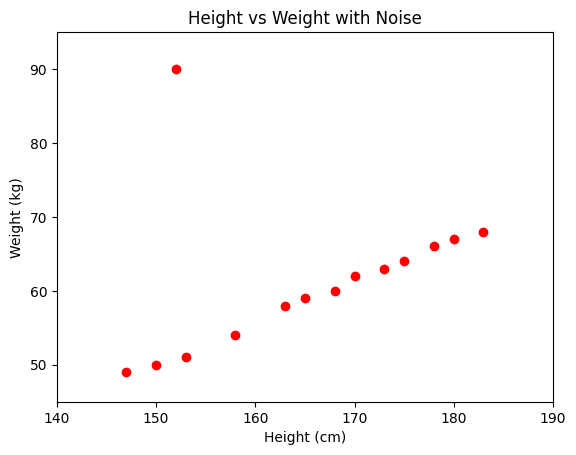

In [21]:
# height (cm)
X = np.array([[147, 150, 152, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 90, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Giống bộ dữ liệu trước, nhưng thêm một điểm nhiễu (90 kg) vào vị trí thứ 3

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 95])   
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')  
plt.title('Height vs Weight with Noise')
plt.show()

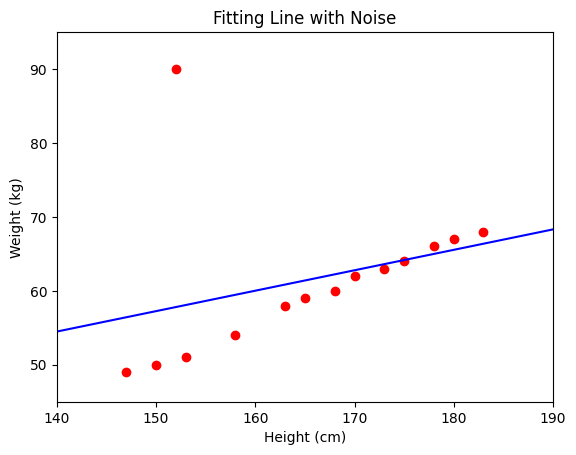

In [22]:
# Huấn luyện mô hình với dữ liệu có nhiễu
one = np.ones((X.shape[0], 1))  
Xbar = np.hstack((one, X))

model = linear_model.LinearRegression(fit_intercept=False)  
model.fit(Xbar, y) 

w_0 = model.coef_[0, 0] 
w_1 = model.coef_[0, 1] 

# Tính toán fitting line
x0 = np.linspace(140, 190, 2)
y0 = w_0 + w_1 * x0

# Vẽ fitting line
plt.plot(X, y, 'ro')  # Vẽ dữ liệu gốc
plt.plot(x0, y0, 'b-')  # Vẽ đường fitting line
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Fitting Line with Noise')
plt.show()


In [ ]:
# In ra giá trị hàm loss
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, model.predict(Xbar))  # Tính toán MA
print("Mean Absolute Error (MAE):", mae)  # In ra giá trị MAE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, model.predict(Xbar))  # Tính toán MSE
print("Mean Squared Error (MSE):", mse)  # In ra giá trị MSE
rmse = np.sqrt(mse)  # Tính toán RMSE
print("Root Mean Squared Error (RMSE):", rmse)  # In ra giá trị RMSE

# Các giá trị MAE, MSE và RMSE sẽ cao hơn so với mô hình không có nhiễu, 
# cho thấy mô hình nhạy cảm với nhiễu trong dữ liệu.

Mean Absolute Error (MAE): 5.182184834572681
Mean Squared Error (MSE): 89.27185755008001
Root Mean Squared Error (RMSE): 9.448378567250574
